In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
directory = '../data/'
output_dir = '../data/csv_grouped_data'

In [18]:
filename_ibex ="../data/grouped_data_day_mean_tweets_sentimentdata-scraper_ibex_2018-2020.csv"
filename_ibex_prices ="../data/ibex_historico.csv"
filename_precios_bolsa = "../data/es_mse_mean_day.csv"
filename_asoc = "../data/grouped_data_day_mean_tweets_sentimentdata-scraper_asociaciones_2016-2020.csv"

df_asoc = pd.read_csv(filename_asoc, sep=";")
df_ibex = pd.read_csv(filename_ibex, sep=";")
df_ibex_prices = pd.read_csv(filename_ibex_prices, sep=",")
df_precios_bolsa = pd.read_csv(filename_precios_bolsa, sep=";")

df_x = pd.merge(left=df_asoc, right=df_ibex, left_on='normalised_date', right_on='normalised_date')
df_total = pd.merge(left=df_x, right=df_ibex_prices, left_on='normalised_date', right_on='Date')
df_total = df_total.rename(columns={"sentiment_x": "sentiment_asociacones", "sentiment_y": "sentiment_ibex"})
df_total["normalised_date"]= pd.to_datetime(df_total["normalised_date"]) 
df_total = df_total[["normalised_date","sentiment_asociacones", "sentiment_ibex", "Close"]]

df_precios_bolsa = df_precios_bolsa[["date", "price_change"]]
df_precios_bolsa["date"]= pd.to_datetime(df_precios_bolsa["date"]) 
df_total = pd.merge(left=df_total, right=df_precios_bolsa, left_on='normalised_date', right_on='date')

df_total.sentiment_asociacones = df_total.sentiment_asociacones
df_total.sentiment_ibex = df_total.sentiment_ibex
df_total.Close = df_total.Close.diff()
df_total = df_total.rename(columns={"Close": "ibex_change", "price_change": "madrid_change"})
df_total['sentiment_asociacones'] = df_total['sentiment_asociacones'].astype(float).diff()
df_total['sentiment_ibex'] = df_total['sentiment_ibex'].astype(float).diff()
df_total['ibex_change'] = df_total['ibex_change'].astype(float)
df_total['madrid_change'] = df_total['madrid_change'].astype(float)

df_total = df_total.dropna()
df_total = df_total[['normalised_date','sentiment_asociacones', 'sentiment_ibex', 'madrid_change']]
df_total.to_csv("df_total_es.csv", sep=";")

df_total_no_covid = df_total.copy()
df_total_no_covid = df_total_no_covid[:-100]
df_total_no_covid



,normalised_date,sentiment_asociacones,sentiment_ibex,madrid_change
1,2017-01-24,0.031742,-0.000420,1.260981
2,2017-01-25,-0.007774,-0.432036,1.614972
3,2017-01-26,-0.038962,0.479446,-0.810021
4,2017-01-27,0.046862,-0.417707,-0.140292
5,2017-01-30,-0.008826,0.478613,-1.385265
...,...,...,...,...
741,2019-12-17,-0.021648,-0.018915,-0.553620
742,2019-12-18,0.049066,0.003646,-0.258039
743,2019-12-19,-0.009887,-0.003893,-0.007002
744,2019-12-20,0.090181,0.017316,0.090962


In [4]:
from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df_total[['sentiment_ibex','madrid_change']], maxlag=2, verbose=True)
granger_test


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7254  , p=0.1894  , df_denom=841, df_num=1
ssr based chi2 test:   chi2=1.7316  , p=0.1882  , df=1
likelihood ratio test: chi2=1.7298  , p=0.1884  , df=1
parameter F test:         F=1.7254  , p=0.1894  , df_denom=841, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3832  , p=0.2513  , df_denom=838, df_num=2
ssr based chi2 test:   chi2=2.7829  , p=0.2487  , df=2
likelihood ratio test: chi2=2.7783  , p=0.2493  , df=2
parameter F test:         F=1.3832  , p=0.2513  , df_denom=838, df_num=2


{1: ({'ssr_ftest': (1.7254059816106881, 0.18935688868192985, 841.0, 1),
   'ssr_chi2test': (1.7315608186437823, 0.1882116892817722, 1),
   'lrtest': (1.7297869985814032, 0.18843810208716177, 1),
   'params_ftest': (1.7254059816104388, 0.18935688868195685, 841.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.3832023178565676, 0.2513461472543097, 838.0, 2),
   'ssr_chi2test': (2.7829106299596336, 0.2487130852453147, 2),
   'lrtest': (2.7783272436181505, 0.24928371292628734, 2),
   'params_ftest': (1.383202317856383, 0.25134614725435644, 838.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [5]:

start_date = "2020-01-01 00:00:00.000"
end_date = "2020-06-01 00:00:00.000"

mask = (df_total['normalised_date'] > start_date) & (df_total['normalised_date'] <= end_date)
df_restricted = df_total.copy()
df_restricted = df_restricted.loc[mask]
print(df_restricted)

from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df_restricted[['sentiment_ibex','madrid_change']], maxlag=1, verbose=True)
print(granger_test)

from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df_restricted[['sentiment_asociacones','madrid_change']], maxlag=1, verbose=True)
print(granger_test)

normalised_date  sentiment_asociacones  sentiment_ibex  madrid_change
750      2020-01-02              -0.144009       -0.007835       1.006015
751      2020-01-03               0.076241        0.046379      -0.444077
752      2020-01-06              -0.304589        0.012344      -0.245572
753      2020-01-07               0.323881       -0.008431      -0.765141
754      2020-01-08              -0.123110        0.081576      -0.091517
..              ...                    ...             ...            ...
841      2020-05-13              -0.041074       -0.033898      -2.211644
842      2020-05-14              -0.039905        0.013097      -1.591394
843      2020-05-15               0.048358        0.036428      -0.840529
844      2020-05-18              -0.028868       -0.019687       5.570912
845      2020-05-19               0.036028       -0.003476      -2.367695

[96 rows x 4 columns]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.2475  , p=0.1373 

In [26]:
from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df_total_no_covid[['sentiment_ibex','madrid_change']], maxlag=1, verbose=True)
print(granger_test)

from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df_total_no_covid[['sentiment_asociacones','madrid_change']], maxlag=1, verbose=True)
print(granger_test)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8235  , p=0.3645  , df_denom=741, df_num=1
ssr based chi2 test:   chi2=0.8268  , p=0.3632  , df=1
likelihood ratio test: chi2=0.8263  , p=0.3633  , df=1
parameter F test:         F=0.8235  , p=0.3645  , df_denom=741, df_num=1
{1: ({'ssr_ftest': (0.8234658020471067, 0.36446379868403833, 741.0, 1), 'ssr_chi2test': (0.8267996716910221, 0.3631995727301932, 1), 'lrtest': (0.8263406047099124, 0.36333282016267165, 1), 'params_ftest': (0.8234658020471194, 0.36446379868401424, 741.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x131a78090>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x131a78950>, array([[0., 1., 0.]])])}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6581  , p=0.4175  , df_denom=741, df_num=1
ssr based chi2 test:   chi2=0.6608  , p=0.4163  , df=1
likelihood ratio test: chi2=0.6605  , p=0.4164  , df=1
parameter 

In [27]:
# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
# Fit the model
model = VAR(df_total_no_covid[['sentiment_asociacones', 'sentiment_ibex', 'madrid_change']])
results = model.fit(maxlags=15, ic='aic')
results.summary()

/Users/hugojosebello/.local/share/virtualenvs/twitter-data-scripts-analysis-AIss9UM-/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 29, Jun, 2020
Time:                     14:52:45
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -11.4922
Nobs:                     733.000    HQIC:                  -11.9199
Log likelihood:           1457.80    FPE:                5.09048e-06
AIC:                     -12.1884    Det(Omega_mle):     4.39135e-06
--------------------------------------------------------------------
Results for equation sentiment_asociacones
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                            -0.000477         0.001829           -0.261           0.794
L1.sentiment_asociacones         -0.809772         0.037742          -21.455           0.

In [19]:
# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
# Fit the model
model_no_covid = VAR(df_total_no_covid[['sentiment_asociacones', 'sentiment_ibex', 'madrid_change']])
results_no_covid = model_no_covid.fit(maxlags=15, ic='aic')
results_no_covid.summary()

/Users/hugojosebello/.local/share/virtualenvs/twitter-data-scripts-analysis-AIss9UM-/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 29, Jun, 2020
Time:                     14:47:35
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -11.4922
Nobs:                     733.000    HQIC:                  -11.9199
Log likelihood:           1457.80    FPE:                5.09048e-06
AIC:                     -12.1884    Det(Omega_mle):     4.39135e-06
--------------------------------------------------------------------
Results for equation sentiment_asociacones
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                            -0.000477         0.001829           -0.261           0.794
L1.sentiment_asociacones         -0.809772         0.037742          -21.455           0.

In [28]:

# convert to (records, timesteps, indicators)
def create_window_data_arrays(arrays,window_size):
    data = np.column_stack((arrays))
    arr_len = len(arrays[0])
    windows = np.array([data[i-window_size: i] for i in range(window_size +1,arr_len+1)])
    return windows


def create_window_data_array_with_shift(array,window_size, shift):
    return np.array([array[i-window_size: i] for i in range(shift +1,len(array)+1)])

In [30]:
lag_order = results.k_ar
print(df_total_no_covid)
train_x = create_window_data_arrays((df_total_no_covid.sentiment_asociacones,df_total_no_covid.sentiment_ibex, df_total_no_covid.madrid_change), lag_order)
print(train_x.shape)
print(train_x[-1])
print("----")

print(df_total_no_covid.values[-1])
print("----")
print(results.forecast(train_x[-1], 1))


normalised_date  sentiment_asociacones  sentiment_ibex  madrid_change
1        2017-01-24               0.031742       -0.000420       1.260981
2        2017-01-25              -0.007774       -0.432036       1.614972
3        2017-01-26              -0.038962        0.479446      -0.810021
4        2017-01-27               0.046862       -0.417707      -0.140292
5        2017-01-30              -0.008826        0.478613      -1.385265
..              ...                    ...             ...            ...
741      2019-12-17              -0.021648       -0.018915      -0.553620
742      2019-12-18               0.049066        0.003646      -0.258039
743      2019-12-19              -0.009887       -0.003893      -0.007002
744      2019-12-20               0.090181        0.017316       0.090962
745      2019-12-23              -0.141086       -0.097664      -0.024881

[745 rows x 4 columns]
(733, 12, 3)
[[-0.17221185 -0.06674422  0.94519472]
 [ 0.0576292   0.10065798 -0.28856559]
 

In [21]:
lag_order_no_covid = results_no_covid.k_ar
print(df_total)
train_x_no_covid = create_window_data_arrays((df_total_no_covid.sentiment_asociacones,df_total_no_covid.sentiment_ibex, df_total_no_covid.madrid_change), lag_order_no_covid)


normalised_date  sentiment_asociacones  sentiment_ibex  madrid_change
1        2017-01-24               0.031742       -0.000420       1.260981
2        2017-01-25              -0.007774       -0.432036       1.614972
3        2017-01-26              -0.038962        0.479446      -0.810021
4        2017-01-27               0.046862       -0.417707      -0.140292
5        2017-01-30              -0.008826        0.478613      -1.385265
..              ...                    ...             ...            ...
841      2020-05-13              -0.041074       -0.033898      -2.211644
842      2020-05-14              -0.039905        0.013097      -1.591394
843      2020-05-15               0.048358        0.036428      -0.840529
844      2020-05-18              -0.028868       -0.019687       5.570912
845      2020-05-19               0.036028       -0.003476      -2.367695

[845 rows x 4 columns]


[0.03549908 0.09244314 0.19908504]
(845, 4)
(733, 3)
0.6931281665508155
[[ 0.75498299 -0.11962496]
 [-0.92035478 -0.14128663]
 [ 0.73546661 -0.20691264]
 ...
 [-0.00700218 -0.00818597]
 [ 0.09096151 -0.34379612]
 [-0.02488097  0.19908504]]


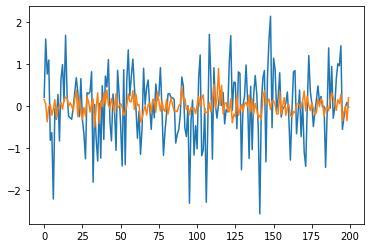

In [32]:
results.forecast(train_x[0], 1)
forecasted = np.array([list(results.forecast(train_x[i], 1)[0]) for i in range(0,train_x.shape[0])])
print(forecasted[-1])

print(df_total.values.shape)
print(forecasted.shape)

# while using one ts
#y_pred = forecasted[:,1:]
y_pred = forecasted[:,2:]
y_train = df_total_no_covid.madrid_change.values[lag_order:]

M = np.column_stack((y_train, y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_train, y_pred))


print(M)
plt.plot(M[-200:])

In [25]:
results_no_covid.forecast(train_x[0], 1)
forecasted = np.array([list(results_no_covid.forecast(train_x_no_covid[i], 1)[0]) for i in range(0,train_x_no_covid.shape[0])])

# while using one ts
#y_pred = forecasted[:,1:]
y_pred = forecasted[:,2:]
train_x_no_covid = df_total_no_covid.madrid_change.values[lag_order_no_covid:]

M = np.column_stack((y_train, y_pred))

from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_train, y_pred))


print(M)
plt.plot(M[-200:])

IndexError: invalid index to scalar variable.

In [11]:
# Split data
nobs = 4
df_train, df_test = df_total[0:-nobs], df_total[-nobs:]
# Check for stationarity with Augmented Dickey-Fuller Test (ADF Test)
# Augmented Dickey-Fuller Test (ADF Test)/unit root test
from statsmodels.tsa.stattools import adfuller

def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")

#apply adf test on the series
adf_test(df_train["sentiment_asociacones"])
adf_test(df_train["sentiment_ibex"])
adf_test(df_train["madrid_change"])

Test Statistic         -1.245297e+01
p-value                 3.541674e-23
# Lags                  2.000000e+01
# Observations          7.190000e+02
Critical Value (1%)    -3.439478e+00
Critical Value (5%)    -2.865568e+00
Critical Value (10%)   -2.568915e+00
dtype: float64
 Series is Stationary
Test Statistic         -1.404283e+01
p-value                 3.280194e-26
# Lags                  1.900000e+01
# Observations          7.200000e+02
Critical Value (1%)    -3.439465e+00
Critical Value (5%)    -2.865563e+00
Critical Value (10%)   -2.568912e+00
dtype: float64
 Series is Stationary
Test Statistic          -26.412281
p-value                   0.000000
# Lags                    0.000000
# Observations          739.000000
Critical Value (1%)      -3.439230
Critical Value (5%)      -2.865459
Critical Value (10%)     -2.568857
dtype: float64
 Series is Stationary
